In [2]:
import pandas as pd


labels = pd.read_csv('label_list.csv', delimiter='|')

head_info_csv = pd.read_csv('head_info.csv')  # Adjust file name if necessary
new_column_names = list(head_info_csv.columns)  # Extract column names

#labels.columns = new_column_names


print(labels.head())


/var/folders/xb/p06xbbjd15jgl24lj7_lcyk40000gn/T/ipykernel_65688/3845638128.py:4: DtypeWarning: Columns (3,5,6,7,10,12,13,15,17,19,20,21,24,26) have mixed types. Specify dtype option on import or set low_memory=False.
  labels = pd.read_csv('label_list.csv', delimiter='|')


  Gustave Courbet                Woman With A Parrot##AAHozJAL0gqXcA  \
0   Auguste Rodin         La Tentation Saint Antoine##WAGC82imJTDyIg   
1     Frida Kahlo   Retrato De Alejandro Gómez Arias##0QFuguLe4xyN_A   
2          Banksy           The Wall Banksy Balloons##FgHoVE-hmt6DBQ   
3        El Greco                     The Visitation##HQEQ_qXDtRrzkA   
4        El Greco  Madonna And Child With Saint Martina And Saint...   

  http://lh3.googleusercontent.com/nPuY2uKye4csy5XdoAjLo9BBL-vz7MKcBLZPuqRFJGai6bDgzoiaXVYa-E0JIzELwQ  \
0  http://lh3.googleusercontent.com/CgGN-xuGOgzBu...                                                    
1  http://lh3.googleusercontent.com/j-stBr_Q1mblB...                                                    
2  http://lh4.ggpht.com/DajPMSanJJDk7gPghfEqoT5Ru...                                                    
3  http://lh4.ggpht.com/dYGuyZERVymx98N9Uw3KKvOU6...                                                    
4  http://lh3.googleusercontent.com/jw0pUX

In [3]:
nan_count = labels['Unnamed: 9'].isna().sum()  # Count NaN values
non_nan_count = labels['Unnamed: 9'].notna().sum()  # Count non-NaN values

print(f"NaN values in 'Unnamed: 9': {nan_count}")
print(f"Non-NaN values in 'Unnamed: 9': {non_nan_count}")


NaN values in 'Unnamed: 9': 401837
Non-NaN values in 'Unnamed: 9': 359437


In [4]:
#By style
#genre_labels = labels[labels['Unnamed: 3'].notna()]
style_labels = labels[labels['Unnamed: 4'].notna()]
style_labels.columns = list(range(style_labels.shape[1] - 1)) + ["path"]

columns_to_keep = [4, 'path']
style_labels_filtered = style_labels[columns_to_keep]
style_labels_filtered = style_labels_filtered.rename(columns={4: 'style'})
style_labels_filtered = style_labels_filtered[style_labels_filtered['path'].notna()]


print(style_labels_filtered)


                                         style  \
16099                                  Italian   
16101            Early Renaissance/ Altarpiece   
26885   Art of the Counter Reform / Altarpiece   
31608                        Gotic/ Altarpiece   
31935                                  Italian   
...                                        ...   
612145           MAC - Movimento Arte Concreta   
613217                     Analytical painting   
613377                     Abstract naturalism   
614187           MAC - Movimento Arte Concreta   
614306                             Abstraction   

                                                     path  
16099   Artists1/Fra Angelico/The Last Judgement Winge...  
16101   Artists1/Fra Angelico/Coronation Of The Virgin...  
26885   Artists1/Federico Barocci/Madonna Of The Peopl...  
31608   Artists1/Ambrogio Lorenzetti/Madonna And Child...  
31935   Artists1/Giovanni Antonio Boltraffio/The Resur...  
...                                    

In [5]:
'''
#applying style
category_keywords = {
    "Renaissance": ["renaissance", "reanaissance", "reinassance"],
    "Baroque": ["baroque"],
    "Gothic": ["gotic", "gothic"],
    "Abstract": ["abstract"],
    "Impressionism": ["impressionism", "impresionism"],
    "Expressionism": ["expressionism"],
    "Surrealism": ["surrealism"],
    "Romanticism": ["romanticism"],
    "Realism": ["realism"],
    "Modernism": ["modernism", "modernisme"],
    "Neoclassicism": ["neoclassicism"],
    "Cubism": ["cubism"],
    "Symbolism": ["symbolism"],
    "Flemish": ["flemish", "flamish"],
    "Dutch": ["dutch"],
    "French": ["french"],
    "Italian": ["italian"],
    "Spanish": ["spanish"],
    "German": ["german"],
    "Japanese": ["ware", "raku", "karatsu", "mino", "seto", "satsuma"],
    "Chinese": ["qingbai", "longquan", "dehua", "yixing"],
    "Photography": ["photography"],
    "Sculpture": ["sculpture"],
    "Conceptual Art": ["conceptual art"],
    "Public Art": ["public art"],
    "Installation": ["installation"],
    "Performance": ["performance"]
}

def classify_style(style, category_keywords):
    style_lower = style.lower()  # Make the search case-insensitive
    for category, keywords in category_keywords.items():
        for keyword in keywords:
            if keyword in style_lower:
                return category
    return "Other"  # Default category for unmatched styles

    import pandas as pd



# Apply the classification function
style_labels_filtered["category"] = style_labels_filtered["style"].apply(classify_style, args=(category_keywords,))

print(style_labels_filtered)
'''

'\n#applying style\ncategory_keywords = {\n    "Renaissance": ["renaissance", "reanaissance", "reinassance"],\n    "Baroque": ["baroque"],\n    "Gothic": ["gotic", "gothic"],\n    "Abstract": ["abstract"],\n    "Impressionism": ["impressionism", "impresionism"],\n    "Expressionism": ["expressionism"],\n    "Surrealism": ["surrealism"],\n    "Romanticism": ["romanticism"],\n    "Realism": ["realism"],\n    "Modernism": ["modernism", "modernisme"],\n    "Neoclassicism": ["neoclassicism"],\n    "Cubism": ["cubism"],\n    "Symbolism": ["symbolism"],\n    "Flemish": ["flemish", "flamish"],\n    "Dutch": ["dutch"],\n    "French": ["french"],\n    "Italian": ["italian"],\n    "Spanish": ["spanish"],\n    "German": ["german"],\n    "Japanese": ["ware", "raku", "karatsu", "mino", "seto", "satsuma"],\n    "Chinese": ["qingbai", "longquan", "dehua", "yixing"],\n    "Photography": ["photography"],\n    "Sculpture": ["sculpture"],\n    "Conceptual Art": ["conceptual art"],\n    "Public Art": ["pub

In [6]:
'''
#examine classifications
other_styles = style_labels_filtered[style_labels_filtered["category"] == "Other"]
print("Styles classified as 'Other':")
print(other_styles)
'''

'\n#examine classifications\nother_styles = style_labels_filtered[style_labels_filtered["category"] == "Other"]\nprint("Styles classified as \'Other\':")\nprint(other_styles)\n'

In [7]:
'''
category_counts = style_labels_filtered["category"].value_counts()
print("\nCount of each category:")
print(category_counts)
'''

'\ncategory_counts = style_labels_filtered["category"].value_counts()\nprint("\nCount of each category:")\nprint(category_counts)\n'

In [8]:
#through some eda, a significant portion of this data is japanese/chinese art (keyword "ware" which can be used in both)
#thus rather than classify by style we will use dates

#By date
#genre_labels = labels[labels['Unnamed: 3'].notna()]

year_labels = labels
year_labels.columns = list(range(year_labels.shape[1] - 1)) + ["path"]
year_labels = labels[labels[9].notna()]
columns_to_keep = [9, 'path']
year_labels_filtered = year_labels[columns_to_keep]
year_labels_filtered = year_labels_filtered.rename(columns={9: 'date'})
#style_labels_filtered = style_labels_filtered[style_labels_filtered['path'].notna()]


print(year_labels_filtered)





                 date                                               path
3       ca. 1610-1614  Artists1/El Greco/The Visitation##HQEQ_qXDtRrz...
44          1745/1806  Artists1/Gim Hongdo/Ducks In Winter##lAHeyXhD5...
49               1867  Artists1/Albert Bierstadt/Emigrants Crossing T...
53               1922  Artists1/Wassily Kandinsky/Blau Blue##2QHHVlpW...
57            1937-04  Artists1/Margaret Bourke-White/Muncie Indiana ...
...               ...                                                ...
761255           1923                                                NaN
761270           1935                                                NaN
761271           1934                                                NaN
761272           1930                                                NaN
761273           1915                                                NaN

[359437 rows x 2 columns]


In [9]:
import re

def extract_century(date_str):
    # lower-case date strings
    date_str = date_str.lower()

    # handling 'century' formatting (bc, bce, etc.)
    century_match = re.search(r"(?:early|late)?\s*(\d{1,2})(?:st|nd|rd|th) century\s*(bc|bce|b\.c\.|b\.c\.e\.)?", date_str)
    if century_match:
        century = int(century_match.group(1))
        if century_match.group(2):  # If BCE variation is present
            return -century
        return century

    # handle plural formatting
    decade_match = re.search(r"(\d{2})00s", date_str)
    if decade_match:
        return int(decade_match.group(1))

    # extract 4 digit years from string
    years = re.findall(r"\b\d{4}\b", date_str)

    if not years:
        # handle bc
        bce_year_match = re.findall(r"(\d{1,4})\s*(bc|bce|b\.c\.|b\.c\.e\.)", date_str)
        if bce_year_match:
            earliest_year = min(int(y[0]) for y in bce_year_match)  # Take the earliest year in a range
            century = (earliest_year - 1) // 100 + 1
            return -century  # Negative century for BCE

        # handle date ranges with bc
        bce_range_match = re.search(r"(\d{1,4})\s*-\s*(\d{1,4})\s*(bc|bce|b\.c\.|b\.c\.e\.)", date_str)
        if bce_range_match:
            earliest_year = min(int(bce_range_match.group(1)), int(bce_range_match.group(2)))
            century = (earliest_year - 1) // 100 + 1
            return -century  # Negative century for BCE

        return None  # return none if no year found

    # convert first year to century
    first_year = int(years[0])
    century = (first_year - 1) // 100 + 1
    return century



# apply funciton on our dates column
year_labels_filtered["century"] = year_labels_filtered["date"].apply(extract_century)

print(year_labels_filtered)


#since were still missing some bc handling despite my best efforts, we will just add a manual fix for the bc values
year_labels_filtered["century"] = year_labels_filtered["century"].apply(lambda x: -x+1 if x is not None and x > 21 else x)

print(year_labels_filtered)

                 date                                               path  \
3       ca. 1610-1614  Artists1/El Greco/The Visitation##HQEQ_qXDtRrz...   
44          1745/1806  Artists1/Gim Hongdo/Ducks In Winter##lAHeyXhD5...   
49               1867  Artists1/Albert Bierstadt/Emigrants Crossing T...   
53               1922  Artists1/Wassily Kandinsky/Blau Blue##2QHHVlpW...   
57            1937-04  Artists1/Margaret Bourke-White/Muncie Indiana ...   
...               ...                                                ...   
761255           1923                                                NaN   
761270           1935                                                NaN   
761271           1934                                                NaN   
761272           1930                                                NaN   
761273           1915                                                NaN   

        century  
3          17.0  
44         18.0  
49         19.0  
53         20.0

In [10]:
#looking at the below distribution, we can see that the data is heavily swayed towards more recent artwork, so I would propose doing one of the following
#classifying art from 14th century - modern
#classifying art by buckets
century_count = year_labels_filtered["century"].value_counts()

#print(century_count)


In [11]:
#classifying the art by century buckets

# defining bucets
century_mapping = {
    "Ancient": range(-59, 10),   # Anything before the 10th century
    "Medieval": range(10, 15),   # 10th to 14th century
    "Renaissance": range(15, 17),  # 15th to 16th century
    "Baroque": range(17, 18),    # 17th century
    "Enlightenment": range(18, 19),  # 18th century
    "Modern": range(19, 21),     # 19th to 20th century
    "Contemporary": range(21, 22)  # 21st century
}

# assigning numeric label to each bucket
period_labels = {name: idx for idx, name in enumerate(century_mapping.keys())}


def map_century_to_period(century):
    try:
        century = int(century)  # Convert safely to int
        for period, centuries in century_mapping.items():
            if century in centuries:
                return period_labels[period]
    except (ValueError, TypeError):  # Catch NaN or unexpected values
        return None  # Return None if mapping fails
    return None  # Return None for unmapped centuries

# apply to mapping
year_labels_filtered["Period_Label"] = year_labels_filtered["century"].apply(map_century_to_period)

# drop rows where mapping failed 
year_labels_filtered = year_labels_filtered.dropna(subset=["Period_Label"]).reset_index(drop=True)

year_labels_filtered

,date,path,century,Period_Label
0,ca. 1610-1614,Artists1/El Greco/The Visitation##HQEQ_qXDtRrz...,17.0,3.0
1,1745/1806,Artists1/Gim Hongdo/Ducks In Winter##lAHeyXhD5...,18.0,4.0
2,1867,Artists1/Albert Bierstadt/Emigrants Crossing T...,19.0,5.0
3,1922,Artists1/Wassily Kandinsky/Blau Blue##2QHHVlpW...,20.0,5.0
4,1937-04,Artists1/Margaret Bourke-White/Muncie Indiana ...,20.0,5.0
...,...,...,...,...
342076,1923,NaN,20.0,5.0
342077,1935,NaN,20.0,5.0
342078,1934,NaN,20.0,5.0
342079,1930,NaN,20.0,5.0


In [12]:
#final cnn prep

year_labels_filtered = year_labels_filtered[year_labels_filtered['path'].notna()]

columns_to_keep = ['path', 'Period_Label']

year_labels_filtered = year_labels_filtered[columns_to_keep]
year_labels_filtered

,path,Period_Label
0,Artists1/El Greco/The Visitation##HQEQ_qXDtRrz...,3.0
1,Artists1/Gim Hongdo/Ducks In Winter##lAHeyXhD5...,4.0
2,Artists1/Albert Bierstadt/Emigrants Crossing T...,5.0
3,Artists1/Wassily Kandinsky/Blau Blue##2QHHVlpW...,5.0
4,Artists1/Margaret Bourke-White/Muncie Indiana ...,5.0
...,...,...
242314,Artists1/Canvas/The Adoration Of The Cross##Rg...,5.0
242315,Artists1/Canvas/Guardando A Sud##pwGrzs42YkNFS...,6.0
242316,Artists1/Canvas/Plan Of The Fortified City Of ...,5.0
242317,Artists1/Canvas/Pounding Rice##aAGUSavl4FAXYw.jpg,5.0


In [13]:
import os
import torch
from sklearn.model_selection import train_test_split

# change patb
image_folder = "/Users/aarongordon/Downloads/art500k/"


df = year_labels_filtered.copy()
#full path with folder name
df["Full_Path"] = df["path"].apply(lambda x: os.path.join(image_folder, x))

# drop nans
df = df.dropna(subset=["Period_Label"]).reset_index(drop=True)

# convert period label to int
df["Period_Label"] = df["Period_Label"].astype(int)

# 80/20 treain test split
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df["Period_Label"], random_state=42)

# Convert to tensors
train_labels = torch.tensor(train_df["Period_Label"].values, dtype=torch.long)
test_labels = torch.tensor(test_df["Period_Label"].values, dtype=torch.long)

print(df)


                                                     path  Period_Label  \
0       Artists1/El Greco/The Visitation##HQEQ_qXDtRrz...             3   
1       Artists1/Gim Hongdo/Ducks In Winter##lAHeyXhD5...             4   
2       Artists1/Albert Bierstadt/Emigrants Crossing T...             5   
3       Artists1/Wassily Kandinsky/Blau Blue##2QHHVlpW...             5   
4       Artists1/Margaret Bourke-White/Muncie Indiana ...             5   
...                                                   ...           ...   
242314  Artists1/Canvas/The Adoration Of The Cross##Rg...             5   
242315  Artists1/Canvas/Guardando A Sud##pwGrzs42YkNFS...             6   
242316  Artists1/Canvas/Plan Of The Fortified City Of ...             5   
242317  Artists1/Canvas/Pounding Rice##aAGUSavl4FAXYw.jpg             5   
242318  Artists1/Canvas/Sutasoma The Prince Sutasoma##...             5   

                                                Full_Path  
0       /Users/aarongordon/Downloads/ar

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def preprocess_image(self, image_path, target_size=(224, 224)):
    # Preprocess the image (resize and normalize)
    from tensorflow.keras.preprocessing import image
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension (only one batch)
    img_array = img_array / 255.0  # Normalize image
    return img_array
    
# mult-class classification
model = Sequential([
    # first layer w padding
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(224, 224, 3)),  #resize images
    MaxPooling2D((2, 2)),  # max pooling

    # Second convolutional layer
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),  # max pooling

    # flatten
    Flatten(),

    # fully connected layer
    Dense(128, activation='relu'),  # First hidden layer
    Dropout(0.5),  
    Dense(64, activation='relu'),  # Second hidden layer
    Dropout(0.5),  

    # output layer
    Dense(len(period_labels), activation='softmax')  # Output layer (one neuron per class)
])
'''
# Simplified CNN model for multi-class classification
model = Sequential([
    # First convolutional layer with padding
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(224, 224, 3)),  # Resize images to 224x224x3
    MaxPooling2D((2, 2)),  # Max pooling

    # Flatten
    Flatten(),

    # Output layer for multi-class classification
    Dense(len(period_labels), activation='softmax')  # Output layer (one neuron per class)
])
'''
# compile model
#using learning rate of 0.0001 adam
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# model summary
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 110, 110, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 55, 55, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 193600)            0         
                                                                 
 dense (Dense)               (None, 128)               2

In [20]:
#attempt 2 w generators

import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import UnidentifiedImageError

# Parameters
image_size = (224, 224)  # Target size for images
image_folder = "/Users/aarongordon/Downloads/art500k"  # Folder containing images
batch_size = 32  # Batch size for training

# Create a DataFrame with image paths and labels
df['Full_Path'] = image_folder + "/" + df['path']

# Function to check and remove corrupt images
def filter_valid_images(df):
    valid_files = []
    for path in df["Full_Path"]:
        try:
            img = load_img(path)  # Try loading the image
            img.verify()  # Verify it's not corrupt
            valid_files.append(path)
        except (UnidentifiedImageError, OSError, FileNotFoundError):
            #print(f"Skipping corrupt/missing file: {path}")  # Log skipped files
            continue  # Skip the corrupt file
    return df[df["Full_Path"].isin(valid_files)]  # Keep only valid images

# Remove corrupt images before splitting data
df = filter_valid_images(df)

# Split the data into train and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Data generators
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='Full_Path',
    y_col='Period_Label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='raw'  # Use 'raw' for regression or integer labels
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='Full_Path',
    y_col='Period_Label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='raw'
)

# Train the model
model.fit(train_generator, epochs=10, validation_data=test_generator)


Found 158802 validated image filenames.
Found 39701 validated image filenames.
Epoch 1/10


2025-02-18 22:29:37.560654: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


4963/4963 [==============================] - ETA: 0s - loss: 0.1891 - accuracy: 0.9470     

2025-02-18 23:37:09.599740: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


4963/4963 [==============================] - 4653s 937ms/step - loss: 0.1891 - accuracy: 0.9470 - val_loss: 0.1712 - val_accuracy: 0.9500
Epoch 2/10
4963/4963 [==============================] - 4177s 842ms/step - loss: 0.1388 - accuracy: 0.9574 - val_loss: 0.1602 - val_accuracy: 0.9528
Epoch 3/10
4963/4963 [==============================] - 4046s 815ms/step - loss: 0.0989 - accuracy: 0.9684 - val_loss: 0.1789 - val_accuracy: 0.9560
Epoch 4/10
4963/4963 [==============================] - 3989s 804ms/step - loss: 0.0704 - accuracy: 0.9777 - val_loss: 0.2336 - val_accuracy: 0.9532
Epoch 5/10
4963/4963 [==============================] - 3989s 804ms/step - loss: 0.0486 - accuracy: 0.9850 - val_loss: 0.3668 - val_accuracy: 0.9547
Epoch 6/10
4963/4963 [==============================] - 4001s 806ms/step - loss: 0.0384 - accuracy: 0.9886 - val_loss: 0.3152 - val_accuracy: 0.9520
Epoch 7/10
4963/4963 [==============================] - 4016s 809ms/step - loss: 0.0292 - accuracy: 0.9914 - val_loss

In [21]:
#showing predictions

import numpy as np
import pandas as pd

# Step 1: Get predictions for the test set
y_pred_prob = model.predict(test_generator)  # Get predicted probabilities
y_pred = np.argmax(y_pred_prob, axis=1)  # Convert probabilities to class labels

# Step 2: Get the actual labels from the test generator
# Reset the generator to ensure we get all the data in order
test_generator.reset()
y_true = test_generator.labels  # Actual labels

# Step 3: Get the image paths from the test generator
image_paths = test_generator.filenames

# Step 4: Create a DataFrame with the results
results_df = pd.DataFrame({
    'Image_Path': image_paths,
    'Actual': y_true,
    'Predicted': y_pred
})

# Step 5: Add a column to check if the prediction was correct
results_df['Correct'] = results_df['Actual'] == results_df['Predicted']

# Print the DataFrame
print(results_df)

# Step 6: Evaluate the model's performance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("\nAccuracy:", accuracy_score(y_true, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))
print("\nClassification Report:\n", classification_report(y_true, y_pred))

2025-02-19 12:06:18.105264: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


1241/1241 [==============================] - 550s 443ms/step
                                              Image_Path  Actual  Predicted  \
0      /Users/aarongordon/Downloads/art500k/Artists1/...       5          5   
1      /Users/aarongordon/Downloads/art500k/Artists1/...       5          5   
2      /Users/aarongordon/Downloads/art500k/Artists1/...       5          5   
3      /Users/aarongordon/Downloads/art500k/Artists1/...       5          5   
4      /Users/aarongordon/Downloads/art500k/Artists1/...       5          5   
...                                                  ...     ...        ...   
39696  /Users/aarongordon/Downloads/art500k/Artists1/...       5          5   
39697  /Users/aarongordon/Downloads/art500k/Artists1/...       2          5   
39698  /Users/aarongordon/Downloads/art500k/Artists1/...       5          5   
39699  /Users/aarongordon/Downloads/art500k/Artists1/...       5          5   
39700  /Users/aarongordon/Downloads/art500k/Artists1/...       6      

/Users/aarongordon/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aarongordon/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aarongordon/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Actual Distribution:
 0       12
1        9
2      231
3      213
4      285
5    37226
6     1725
Name: Actual, dtype: int64

Predicted Distribution:
 0        4
2      134
3       59
4      122
5    38213
6     1169
Name: Predicted, dtype: int64


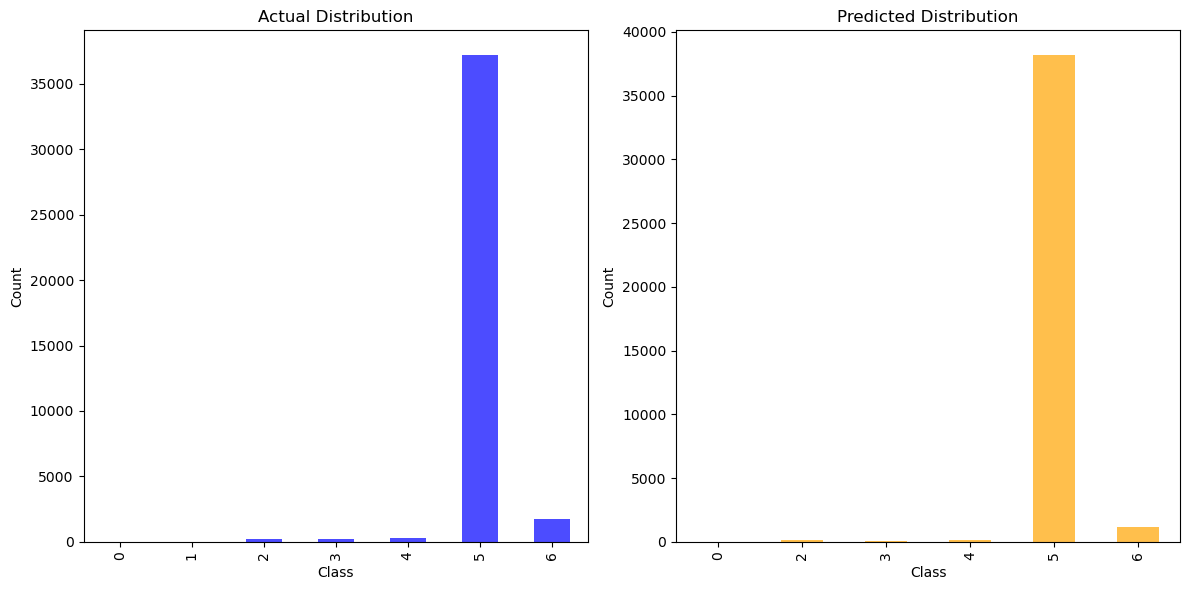

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have the results_df DataFrame
# results_df contains columns: 'Image_Path', 'Actual', 'Predicted', 'Correct'

# Step 1: Get the distribution of actual labels
actual_distribution = results_df['Actual'].value_counts().sort_index()
print("Actual Distribution:\n", actual_distribution)

# Step 2: Get the distribution of predicted labels
predicted_distribution = results_df['Predicted'].value_counts().sort_index()
print("\nPredicted Distribution:\n", predicted_distribution)

# Step 3: Plot the distributions
plt.figure(figsize=(12, 6))

# Plot actual distribution
plt.subplot(1, 2, 1)
actual_distribution.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Actual Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

# Plot predicted distribution
plt.subplot(1, 2, 2)
predicted_distribution.plot(kind='bar', color='orange', alpha=0.7)
plt.title('Predicted Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [26]:
# Preprocess the image

image_path = "/Users/aarongordon/Downloads/mid.jpg"
input_image = preprocess_image(image_path)

# Step 2: Make a prediction
prediction = model.predict(input_image)

# Step 3: Convert the prediction to a class label
predicted_class = np.argmax(prediction, axis=1)[0]

# Step 4: Print the result
print(f"Predicted class for 'mid.jpg': {predicted_class}")

1/1 [==============================] - 0s 98ms/step
Predicted class for 'mid.jpg': 5


In [ ]:
#initial attempt

import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split

# paramaters
image_size = (224, 224)  # target size for images
image_folder = "/Users/aarongordon/Downloads/art500k"  



# load and preprocess images
def load_and_preprocess_image(image_path):
    try:
        img = load_img(image_path, target_size=image_size)  
        img_array = img_to_array(img) / 255.0  # normalize image
        return img_array
    except Exception as e:
        #print(f"Error loading {image_path}: {e}")
        return None  # handling for missing files (theres afew non-existent path names)

# load images
df['Full_Path'] = image_folder + "/" + df['path']

print("Loading images... This may take some time.")


images = [load_and_preprocess_image(path) for path in df['Full_Path']]
labels = df['Period_Label'].values  # Target labels

# remove none values
images = [img for img in images if img is not None]
labels = labels[:len(images)]  #ensure labels and image smatch
print(f"Successfully loaded {len(images)} images.")

#  convert to numpy array
X = np.array(images, dtype=np.float32)
y = np.array(labels, dtype=np.int32)  # Assuming labels are integers

# train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Loading images... This may take some time.


In [ ]:
#debugging print
print(f"Missing files: {len(train_generator.missing_files)}")